# Getting knot core data from [KnotProt](https://knotprot.cent.uw.edu.pl/api)

In [1]:
import requests

API_URL = 'https://knotprot.cent.uw.edu.pl/'

In [2]:
def perform_request(url_specification):
    response = requests.get(API_URL + url_specification)
    print(f'Response returned code {response.status_code}.')
    if response.ok:
        response_content = response.content.decode('utf-8') 
        return response_content if response_content != 'N/A' else ''
    else:
        return ''
    
def get_sequences_with_knot_ranges():
    # knot range is tha last element on line, in format <START>-<END>
    return perform_request('_all_chains_knotted_N_C_sequence')

In [3]:
response = get_sequences_with_knot_ranges()

Response returned code 200.


In [4]:
from io import StringIO
import csv

f = StringIO(response)
reader = csv.reader(f, delimiter=';')
data = list(reader)

# header:
data[0]

['# PDB code',
 'Chain',
 'PFAM Acc',
 'Chain Length',
 '{Y,A,T}={Published,Artifact,Not published}',
 '{K,S}={Knot,Slipknot}',
 'Main knot type (e.g. 31=3.1)',
 'N_cut',
 'C_cut',
 'Knots range',
 'Sequence']

## Clean the data:

In [5]:
import pandas as pd

df = pd.DataFrame(data[1:], columns=data[0])
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,Sequence
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
4,1ajd,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
...,...,...,...,...,...,...,...,...,...,...,...
2574,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...
2575,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...
2576,1jr1,A,PF00571,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...
2577,3pff,A,None,811,T,S,31,4,129,437-680,SAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDH...


In [6]:
# remove sequences that don't have knot range information (there are only 2):
df = df.drop(df[df['Knots range'] == 'None'].index)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,Sequence
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
4,1ajd,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
...,...,...,...,...,...,...,...,...,...,...,...
2574,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...
2575,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...
2576,1jr1,A,PF00571,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...
2577,3pff,A,None,811,T,S,31,4,129,437-680,SAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDH...


In [7]:
df = df.rename(columns={'Sequence': 'sequence'})

### Handle duplicates in the `sequence` column:

In [8]:
df['sequence'].value_counts()

HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK                                                                                                                                                                                                                                                                                                   258
HHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK                                                                                                                                                                                              

In [9]:
df.loc[df['sequence'] == 'HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK']

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence
1070,5cjl,A,None,257,Y,K,31,25,4,26-253,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...
1180,5dog,A,None,257,Y,K,31,26,4,27-253,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...
1182,5lle,A,None,257,Y,K,31,25,4,26-253,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...
1183,5llg,A,None,257,Y,K,31,25,5,26-252,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...
1184,3mhl,A,PF00194,257,Y,K,31,21,3,22-255,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...
...,...,...,...,...,...,...,...,...,...,...,...
2293,6km4,A,PF00194,257,Y,S,31,1,2,28-255,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...
2294,6km5,A,PF00194,257,Y,K,31,21,4,22-254,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...
2295,6km6,A,PF00194,257,Y,S,31,21,2,22-255,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...
2300,6yma,A,PF00194,257,Y,K,31,22,4,23-254,HWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSV...


In [10]:
# only first row with duplicate sequence is kept - the knot core ranges are not too different, 
# but if they were, this should have been handled differently
df.drop_duplicates(subset=['sequence'], keep='first', inplace=True, ignore_index=True)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...
4,1ali,A,PF00245,446,Y,S,31,42,31,43-366,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...
...,...,...,...,...,...,...,...,...,...,...,...
1173,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...
1174,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...
1175,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...
1176,3pff,A,None,811,T,S,31,4,129,437-680,SAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDH...


### Sequence length distribution:

In [11]:
import matplotlib.pyplot as plt

def plot_df(plt_size_x, plt_size_y, df, column_name, y_scale):
    plt.rcParams['figure.figsize'] = (plt_size_x, plt_size_y)
    ax = df.plot(x='index', y=column_name, kind='bar', rot=90)  # rot to rotate x-axis data point description
    plt.ylim([0, y_scale])  # force y-axis scale to be the same as it is for the other graph
    plt.show()
    

def plot_column_value_count_distribution(df, column_name):
    df_lengths = df[column_name].value_counts().to_frame()
    df_lengths['index'] = df_lengths.index
    df_lengths = df_lengths.sort_values('index')
    df_lengths = df_lengths.reset_index(drop=True)
    
    middle_index = len(df_lengths) // 2
    
    y_scale = df_lengths.max()[column_name] + 5
    
    plot_df(30, 3, df_lengths.head(middle_index), column_name, y_scale)
    plot_df(30, 3, df_lengths.tail(len(df_lengths) - middle_index), column_name, y_scale)

In [12]:
df['seq_length'] = df.apply(lambda row: (len(row['sequence'])), axis = 1)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,243
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,435
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,449
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,446
4,1ali,A,PF00245,446,Y,S,31,42,31,43-366,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,446
...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,246
1174,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,241
1175,1jr1,A,PF00478,498,T,K,31,114,349,115-149,GLTAQQLFNCGDGLTYNDFLILPGYIDFTADQVDLTSALTKKITLK...,436
1176,3pff,A,None,811,T,S,31,4,129,437-680,SAKAISEQTGKELLYKFICTTSAIQNRFKYARVTPDTDWARLLQDH...,735


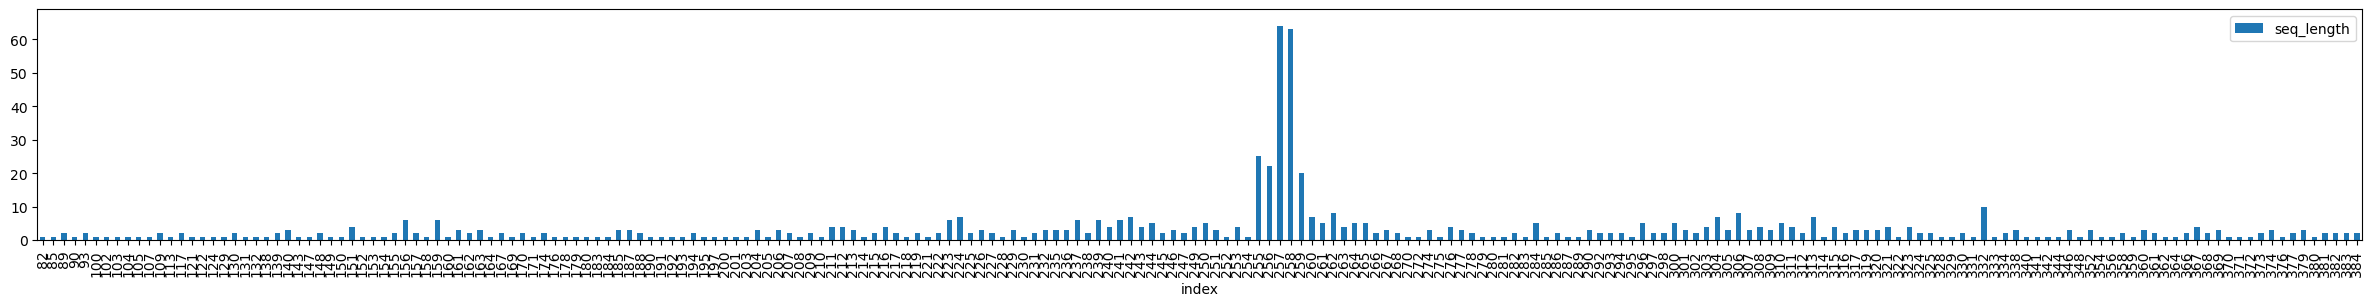

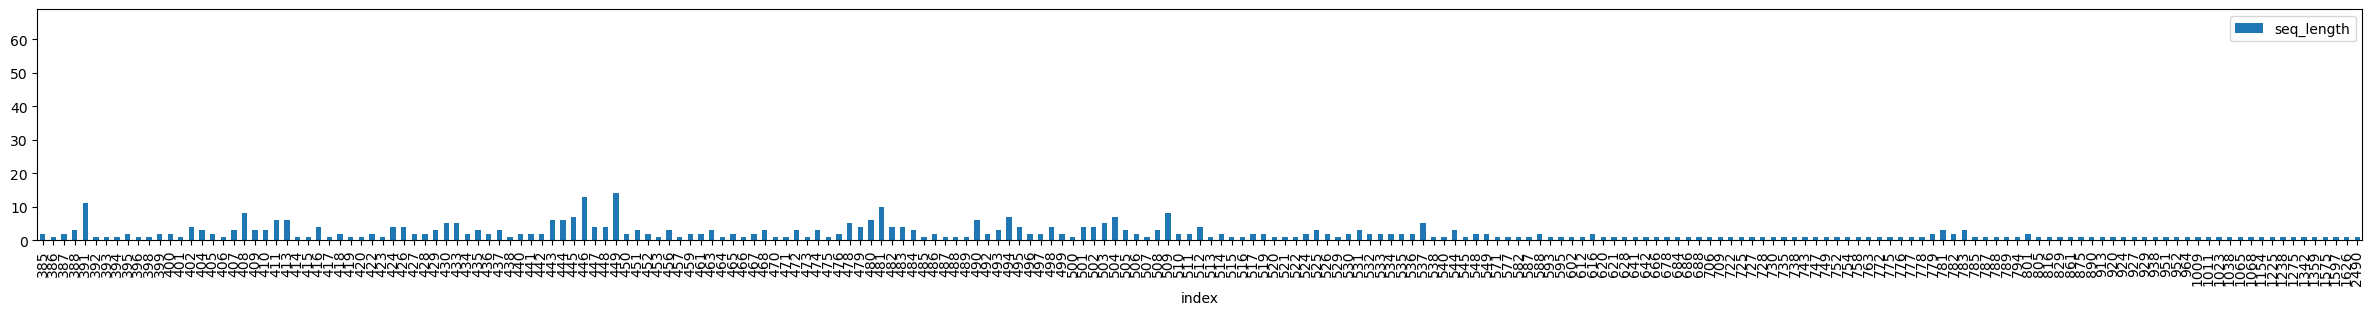

In [13]:
plot_column_value_count_distribution(df, 'seq_length')

In [14]:
# drop all sequences with sequence_length > 500:
df.drop(df.loc[df['seq_length'] > 500].index, inplace=True)

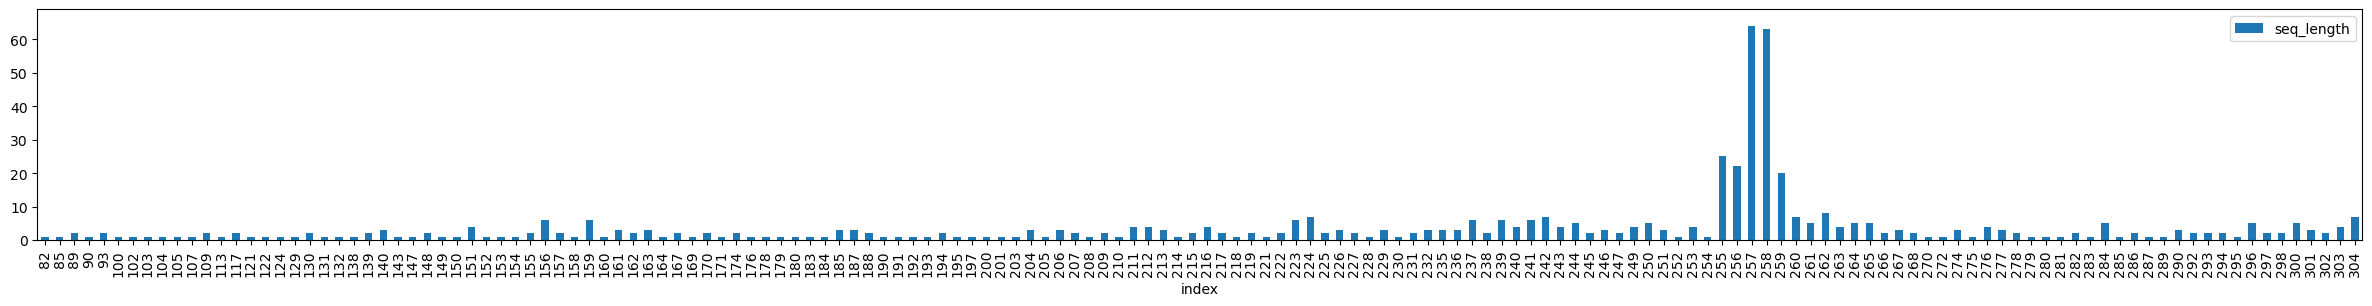

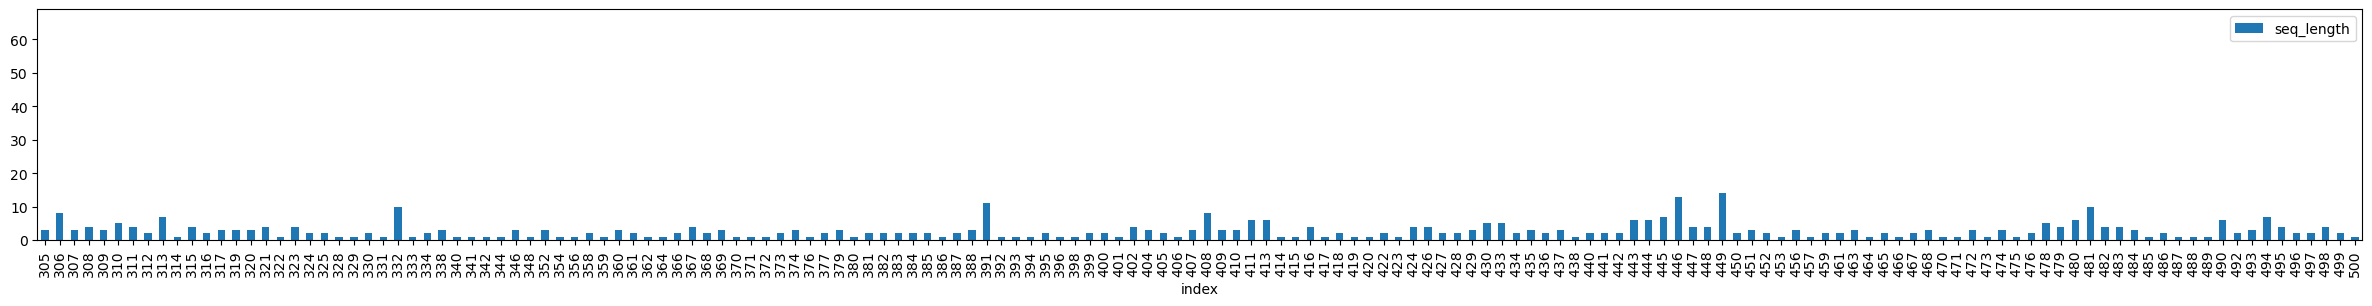

In [15]:
plot_column_value_count_distribution(df, 'seq_length')

### Handle `X` occurences:

In [16]:
df['x_count'] = df.apply(lambda row: row['sequence'].count('X'), axis = 1)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length,x_count
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,243,0
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,435,0
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,449,0
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,446,0
4,1ali,A,PF00245,446,Y,S,31,42,31,43-366,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,446,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,4c41,A,None,369,T,S,31,29,31,229-337,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,367,0
1172,5li4,A,None,549,T,K,31,145,284,146-265,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,427,0
1173,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,246,0
1174,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,241,0


In [17]:
df.loc[df['x_count'] > 0]

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length,x_count
8,1auk,A,PF00884,485,Y,S,31,6,192,7-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,481,1
9,1b8j,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,449,1
21,1e33,P,PF00884,485,Y,S,31,6,192,7-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,481,1
56,1n2k,A,PF00884,486,Y,S,31,6,193,7-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,482,1
57,1n2l,A,PF00884,486,Y,S,31,7,192,8-263,RPPNIVLIFADDLGYGDLGCYGHPSSTTPNLDQLAAGGLRFTDFYV...,483,1
191,3ed7,A,PF00303,289,Y,K,31,5,74,6-215,LXXXXPPHGELQYLGQIQHILRCGVRKDDRTGTGTLSVFGMQARYS...,284,4
298,4fdi,A,PF00884,494,Y,S,31,5,202,6-261,QPPNILLLLMDDMGWGDLGVYGEPSRETPNLDRMAAEGLLFPNFYS...,494,1
342,4o6d,B,PF00948,377,Y,K,31,81,204,82-173,XXXXXXFQSNADTGCAIDISRQELRCGSGVFIHNDVEAWMDRYKYY...,341,6
399,4fdj,A,PF00884,493,Y,S,31,6,200,7-261,PQPPNILLLLMDDMGWGDLGVYGEPSRETPNLDRMAAEGLLFPNFY...,493,1
446,4miv,A,PF00884,484,Y,S,31,5,213,6-252,PRNALLLLADDGGFESGAYNNSAIATPHLDALARRSLLFRNAFTSV...,484,1


In [18]:
# drop all sequences with x_count > 0:
df.drop(df.loc[df['x_count'] > 0].index, inplace=True)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length,x_count
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,243,0
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,435,0
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,449,0
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,446,0
4,1ali,A,PF00245,446,Y,S,31,42,31,43-366,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,446,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,4c41,A,None,369,T,S,31,29,31,229-337,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,367,0
1172,5li4,A,None,549,T,K,31,145,284,146-265,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,427,0
1173,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,246,0
1174,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,241,0


### Create separate interval columns:

In [19]:
df['knot_start'] = df.apply(lambda row: row['Knots range'].split('-')[0], axis = 1)
df['knot_end'] = df.apply(lambda row: row['Knots range'].split('-')[1], axis = 1)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length,x_count,knot_start,knot_end
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,243,0,89,132
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,435,0,46,369
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,449,0,46,369
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,446,0,46,369
4,1ali,A,PF00245,446,Y,S,31,42,31,43-366,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,446,0,43,366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,4c41,A,None,369,T,S,31,29,31,229-337,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,367,0,229,337
1172,5li4,A,None,549,T,K,31,145,284,146-265,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,427,0,146,265
1173,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,246,0,15,163
1174,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,241,0,35,73


In [20]:
# pd.set_option('display.max_rows', 500)
df['knot_end'].value_counts()

255    70
254    51
253    37
256    35
264    22
       ..
413     1
193     1
182     1
367     1
73      1
Name: knot_end, Length: 257, dtype: int64

### Look at knot core lengths distribution:

In [21]:
df['knot_length'] = df.apply(lambda row: (int(row['knot_end']) - int(row['knot_start'])), axis = 1)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length,x_count,knot_start,knot_end,knot_length
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,243,0,89,132,43
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,435,0,46,369,323
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,449,0,46,369,323
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,446,0,46,369,323
4,1ali,A,PF00245,446,Y,S,31,42,31,43-366,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,446,0,43,366,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,4c41,A,None,369,T,S,31,29,31,229-337,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,367,0,229,337,108
1172,5li4,A,None,549,T,K,31,145,284,146-265,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,427,0,146,265,119
1173,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,246,0,15,163,148
1174,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,241,0,35,73,38


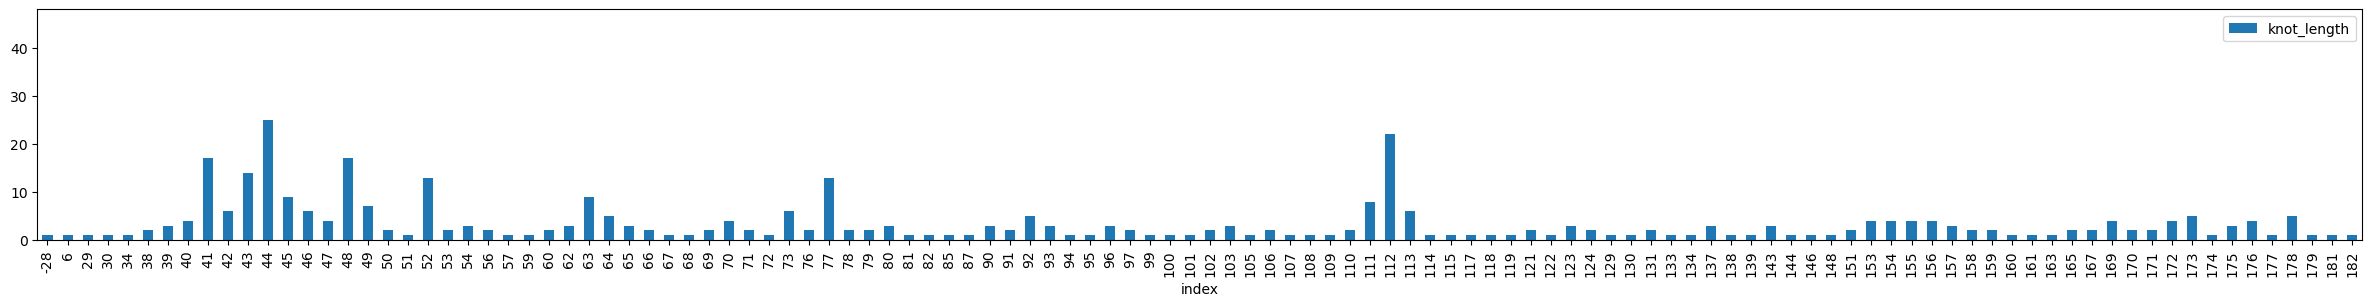

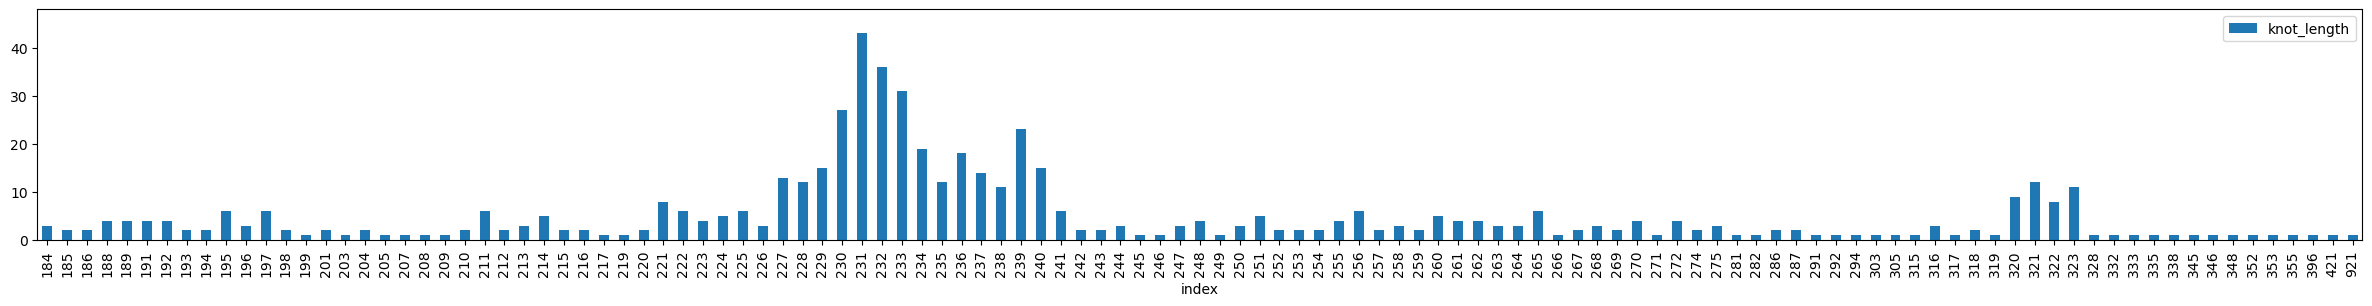

In [22]:
plot_column_value_count_distribution(df, 'knot_length')

In [23]:
df.loc[df['knot_length'] < 0]

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length,x_count,knot_start,knot_end,knot_length
938,6i7s,A,PF00085,461,Y,S,31,4,268,220-192,APEEEDHVLVLRKSNFAEALAAHKYLLVEFYAPWCGHCKALAPEYA...,461,0,220,192,-28


In [24]:
# drop all sequences with negative knot core lengths:
df.drop(df.loc[df['knot_length'] < 0].index, inplace=True)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length,x_count,knot_start,knot_end,knot_length
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,243,0,89,132,43
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,435,0,46,369,323
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,449,0,46,369,323
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,446,0,46,369,323
4,1ali,A,PF00245,446,Y,S,31,42,31,43-366,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,446,0,43,366,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,4c41,A,None,369,T,S,31,29,31,229-337,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,367,0,229,337,108
1172,5li4,A,None,549,T,K,31,145,284,146-265,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,427,0,146,265,119
1173,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,246,0,15,163,148
1174,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,241,0,35,73,38


https://knotprot.cent.uw.edu.pl/view/4zg6/A/

Slipknot ranges are not returned by the API. 

### TODO: have a look at how many sequences have only knot cores and how many also have slipknots

#### Calculate average % of knot core with respect to sequence length:

In [25]:
df['knot_core_percentage'] = (df['knot_length'] * 100) / df['seq_length']
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length,x_count,knot_start,knot_end,knot_length,knot_core_percentage
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,243,0,89,132,43,17.695473
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,435,0,46,369,323,74.252874
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,449,0,46,369,323,71.937639
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,446,0,46,369,323,72.421525
4,1ali,A,PF00245,446,Y,S,31,42,31,43-366,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,446,0,43,366,323,72.421525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,4c41,A,None,369,T,S,31,29,31,229-337,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,367,0,229,337,108,29.427793
1172,5li4,A,None,549,T,K,31,145,284,146-265,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,427,0,146,265,119,27.868852
1173,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,246,0,15,163,148,60.162602
1174,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,241,0,35,73,38,15.767635


In [26]:
print(f'Mean:   {df["knot_core_percentage"].mean()}')
print(f'Median: {df["knot_core_percentage"].median()}')
print(f'Max:    {df["knot_core_percentage"].max()}')
print(f'Min:    {df["knot_core_percentage"].min()}')

Mean:   60.14181558258575
Median: 64.34977578475336
Max:    575.625
Min:    4.316546762589928


In [27]:
df.loc[df['knot_core_percentage'] > 99]

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length,x_count,knot_start,knot_end,knot_length,knot_core_percentage
170,2zkt,A,PF01676,412,Y,S,31,7,51,8-346,MVLKRKGLLIILDGLGDRPIKELNGLTPLEYANTPNMDKLAEIGIL...,330,0,8,346,338,102.424242
437,4chj,A,None,139,Y,K,41,4,11,5-128,ADLEIGREGEVIQVSKEAFDNWMNRYEAGDTMEVLFPDGHRIECNL...,124,0,5,128,123,99.193548
476,4etq,C,PF00194,233,Y,K,31,3,2,4-231,QQLSPINIETKKAISNARLKPLDIHYNESKPTTIQNTGKLVRINFK...,225,0,4,231,227,100.888889
1023,1t0h,B,None,219,A,K,31,21,2,22-217,RMPFTPPYDVVPSMRPVVLVGPSLKGYEVTDMMQKALFDFLKHRFE...,187,0,22,217,195,104.278075
1045,1t0j,B,None,215,A,K,31,17,2,18-213,FTPPYDVVPSMRPVVLVGPSLKGYEVTDMMQKALFDFLKHRFEGRI...,187,0,18,213,195,104.278075
1057,2w6e,G,None,272,A,K,31,44,52,45-220,ATLKDITRRLKSIKNIQKITKSMKMVAAAKYARAERELKPARVYLC...,122,0,45,220,175,143.442623
1131,6kw3,I,None,481,A,S,31,120,3,134-376,TQTNPVPVTYPTDAYIPTYLPDDKVSNLADLKKLIEMDSRLDLYLT...,244,0,134,376,242,99.180328
1150,5gxj,A,None,210,A,S,41,167,11,168-1089,DMYIERAGDITWEKDAEVTTTDGVYRVMTRRLLGSTQVGVGVMQEG...,160,0,168,1089,921,575.625000


In [28]:
# drop all sequences with knot core lengths greater than sequence lengths:
df.drop(df.loc[df['knot_core_percentage'] > 100].index, inplace=True)
df

,# PDB code,Chain,PFAM Acc,Chain Length,"{Y,A,T}={Published,Artifact,Not published}","{K,S}={Knot,Slipknot}",Main knot type (e.g. 31=3.1),N_cut,C_cut,Knots range,sequence,seq_length,x_count,knot_start,knot_end,knot_length,knot_core_percentage
0,1uak,A,PF01746,252,Y,K,31,88,120,89-132,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,243,0,89,132,43,17.695473
1,1aja,A,PF00245,449,Y,S,31,45,31,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,435,0,46,369,323,74.252874
2,1ajb,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,449,0,46,369,323,71.937639
3,1ajc,A,PF00245,449,Y,S,31,45,30,46-369,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,446,0,46,369,323,72.421525
4,1ali,A,PF00245,446,Y,S,31,42,31,43-366,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,446,0,43,366,323,72.421525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,4c41,A,None,369,T,S,31,29,31,229-337,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,367,0,229,337,108,29.427793
1172,5li4,A,None,549,T,K,31,145,284,146-265,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,427,0,146,265,119,27.868852
1173,1ybw,A,PF00089,253,T,K,31,14,90,15-163,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,246,0,15,163,148,60.162602
1174,1pv2,A,None,276,T,K,31,34,203,35-73,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,241,0,35,73,38,15.767635


## Save the cleaned data to a CSV file:

In [29]:
df_reduced = df[['sequence', 'knot_start', 'knot_end', 'knot_length']].copy()
df_reduced

,sequence,knot_start,knot_end,knot_length
0,SHMWIGVISLFPEMFKAITEFGVTGRAVKHNLLKVECWNPRDFTFD...,89,132,43
1,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
2,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
3,TPEMPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNII...,46,369,323
4,MPVLENRAAQGDITAPGGARRLTGDQTAALRDSLSDKPAKNIILLI...,43,366,323
...,...,...,...,...
1171,RGLASANVDFAFSLYKHLVALSPKKNIFISPVSISMALAMLSLGTC...,229,337,108
1172,SSEKVFCLIGQAEGGEPNTVYELRNYSQAKRLFRSGELLDAIELAW...,146,265,119
1173,ACGRRHKKIIGGSSSLPGSHPWLAAIYIGDSFCAGSLVHTCWVVSA...,15,163,148
1174,TSKNPQVDIAEDNAFFPSEYSLSKILVIAADERYLPTDNGKLFSTG...,35,73,38


In [30]:
df_reduced.to_csv('/home/jovyan/data/proteins/knot_prot_reduced.csv', index=False)